# Project 2: COVID Choropleths
## Using csv and pandas packages, RGB and HSV color models to make two choropleths of the lower 48 United States. One will show the number of new COVID-19 cases in each state at the height of this past winter surge (at the start of January 2023). The second will show the number of new cases (at the start of May)

In [6]:
# !apt-get install -qq libgdal-dev libproj-dev
# !pip install --no-binary shapely shapely --force
# !pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import random, csv
import cartopy.io.shapereader as shpreader
import pandas as pd
import colorsys as csys
import cartopy.io.shapereader as shpreader
import matplotlib as mpl



In [7]:
from os import read
def control_files():
  POP_FILE = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/population.csv'
  COVID_FILE = '/Users/luismonteiro/Desktop/Data_Engineering/CSC-234_DataStorage/Weekly_United_States_COVID-19_Cases_and_Deaths_by_State_-_ARCHIVED.csv'

  read_pop = pd.read_csv(POP_FILE)
  read_covid = pd.read_csv(COVID_FILE, parse_dates= True )

  read_pop = read_pop.drop(read_pop.index[:5])
  read_pop = read_pop.drop([6,13,16])
  lower_states = read_pop['Geographic Area']

  read_covid = read_covid[read_covid['state'].isin(lower_states)]
  return read_pop, read_covid

# given a list of keys, like ["A","B","C"], and a list of values,
# like [1,2,3], return a dictionary mapping keys to values, like
# {"A":1, "B":2, "C":3} for the above example.
def lists_to_dict(key_list, value_list):
  d = {}
  for i in range(len(key_list)):
    d[key_list[i]] = value_list[i]

  return d

# clean the population file by creating a dataframe that
# has one row for each of the lower 48 states, and just
# two columns: the state abbreviation and the latest
# (2022) population estimate for that state.Make sure the
# population column is of type int64, not string or object.
# Be sure to sort by state before returning the cleaned dataframe.
def clean_pop():

  read_pop, read_covid = control_files()
  read_pop["2022"] = read_pop["2022"].str.replace(',','')
  read_pop["2022"] = read_pop["2022"].astype('int64')

  sorted_pop = read_pop.sort_values(by=['Geographic Area'], ascending=True)
  clean_pop = sorted_pop[['Geographic Area', '2022']]

  return clean_pop



# return two lists: one of the lower 48 states, one of the latest (2022)
# population estimates that correspond to the states in the state list
def get_pop_lists():

  read_pop = clean_pop()
  state_list = read_pop["Geographic Area"].to_list()
  pop_list = read_pop["2022"].to_list()

  return state_list, pop_list

# clean the COVID csv file by creating a dataframe that
# has one row for each of the lower 48 states, and three
# columns: the starting date of the week (which should
# match the parameter), the state abbreviation, and the
# number of new cases during that week (as an int).
# Be sure to sort by state before returning
# the cleaned dataframe.
def clean_covid(start_date):

  read_pop, read_covid = control_files()
  sorted_state = read_covid.sort_values(by=['state'], ascending=True)

  sorted_state['new_cases'] = sorted_state['new_cases'].astype(int)
  clean_covid = sorted_state[(sorted_state['start_date'] == start_date)][['start_date','new_cases' , 'state']]



  return clean_covid



# given a date, return a dictionary mapping
# state to new COVID cases per 100,000 people
# for that date (this one is required)
def make_dict(date):

 state_list, pop_list = get_pop_lists()
 read_covid = clean_covid(date)
 new_cases_list = read_covid['new_cases'].to_list()

#  print(f'this is state with new covid {len(covid_state_list)}')
#  print(f' this is a list of state for the pop{len(state_list)}')
#  print(f' this is a list of new cases {len(new_cases_list)}')
#  print(f' this is a list of pop list {len(pop_list)}')

 NOfCovidCaseList = []
 for i in range(len(new_cases_list)):
            n_of_covid_cases = (new_cases_list[i] / pop_list[i])* 100000
            NOfCovidCaseList.append(n_of_covid_cases)


 print(len(NOfCovidCaseList))

 StateNewCovidCases = lists_to_dict(state_list, NOfCovidCaseList)

 return StateNewCovidCases



In [8]:
COLORDICT = {"red":0, "orange":30, "yellow":60, "chartreuse":90,\
             "green":120, "spring green":150, "cyan":180,\
             "azure":210, "blue":240, "violet":270,\
             "magenta":300, "rose":330}

# given a tuple of rgb numbers like (0,255,255),
# return the hex equivalent like "#00ffff"
def rgb2hex(rgb):
    return '#%02x%02x%02x' % rgb

# Given number in range [0,maximum] return a shade of that color where 0=light
# and maximum=dark. The color parameter is just a string like "orange",
# but the returned color is in 6-digit hex format like "#ff007c"
def color_picker(number, maximum, color):

    v = 1.0
    h = COLORDICT[color]/360
    if number == 0:
        s = 0
    else:
        s = float(number) / maximum

    rgb = csys.hsv_to_rgb(h,s,v)
    converted_rgb = (rgb[0]* 255, rgb[1] * 255, rgb[2] * 255)
    print(f'this is the conveted_rgb {converted_rgb}')

    tuple_of_integers = ()
    for value in converted_rgb:
      tuple_of_integers += (int(value), )

    return rgb2hex(tuple_of_integers)

48
48


/var/folders/lv/v8dd5z596_d_nsr45ppwbxqh0000gn/T/ipykernel_23452/2154999244.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3)
/var/folders/lv/v8dd5z596_d_nsr45ppwbxqh0000gn/T/ipykernel_23452/2154999244.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3)


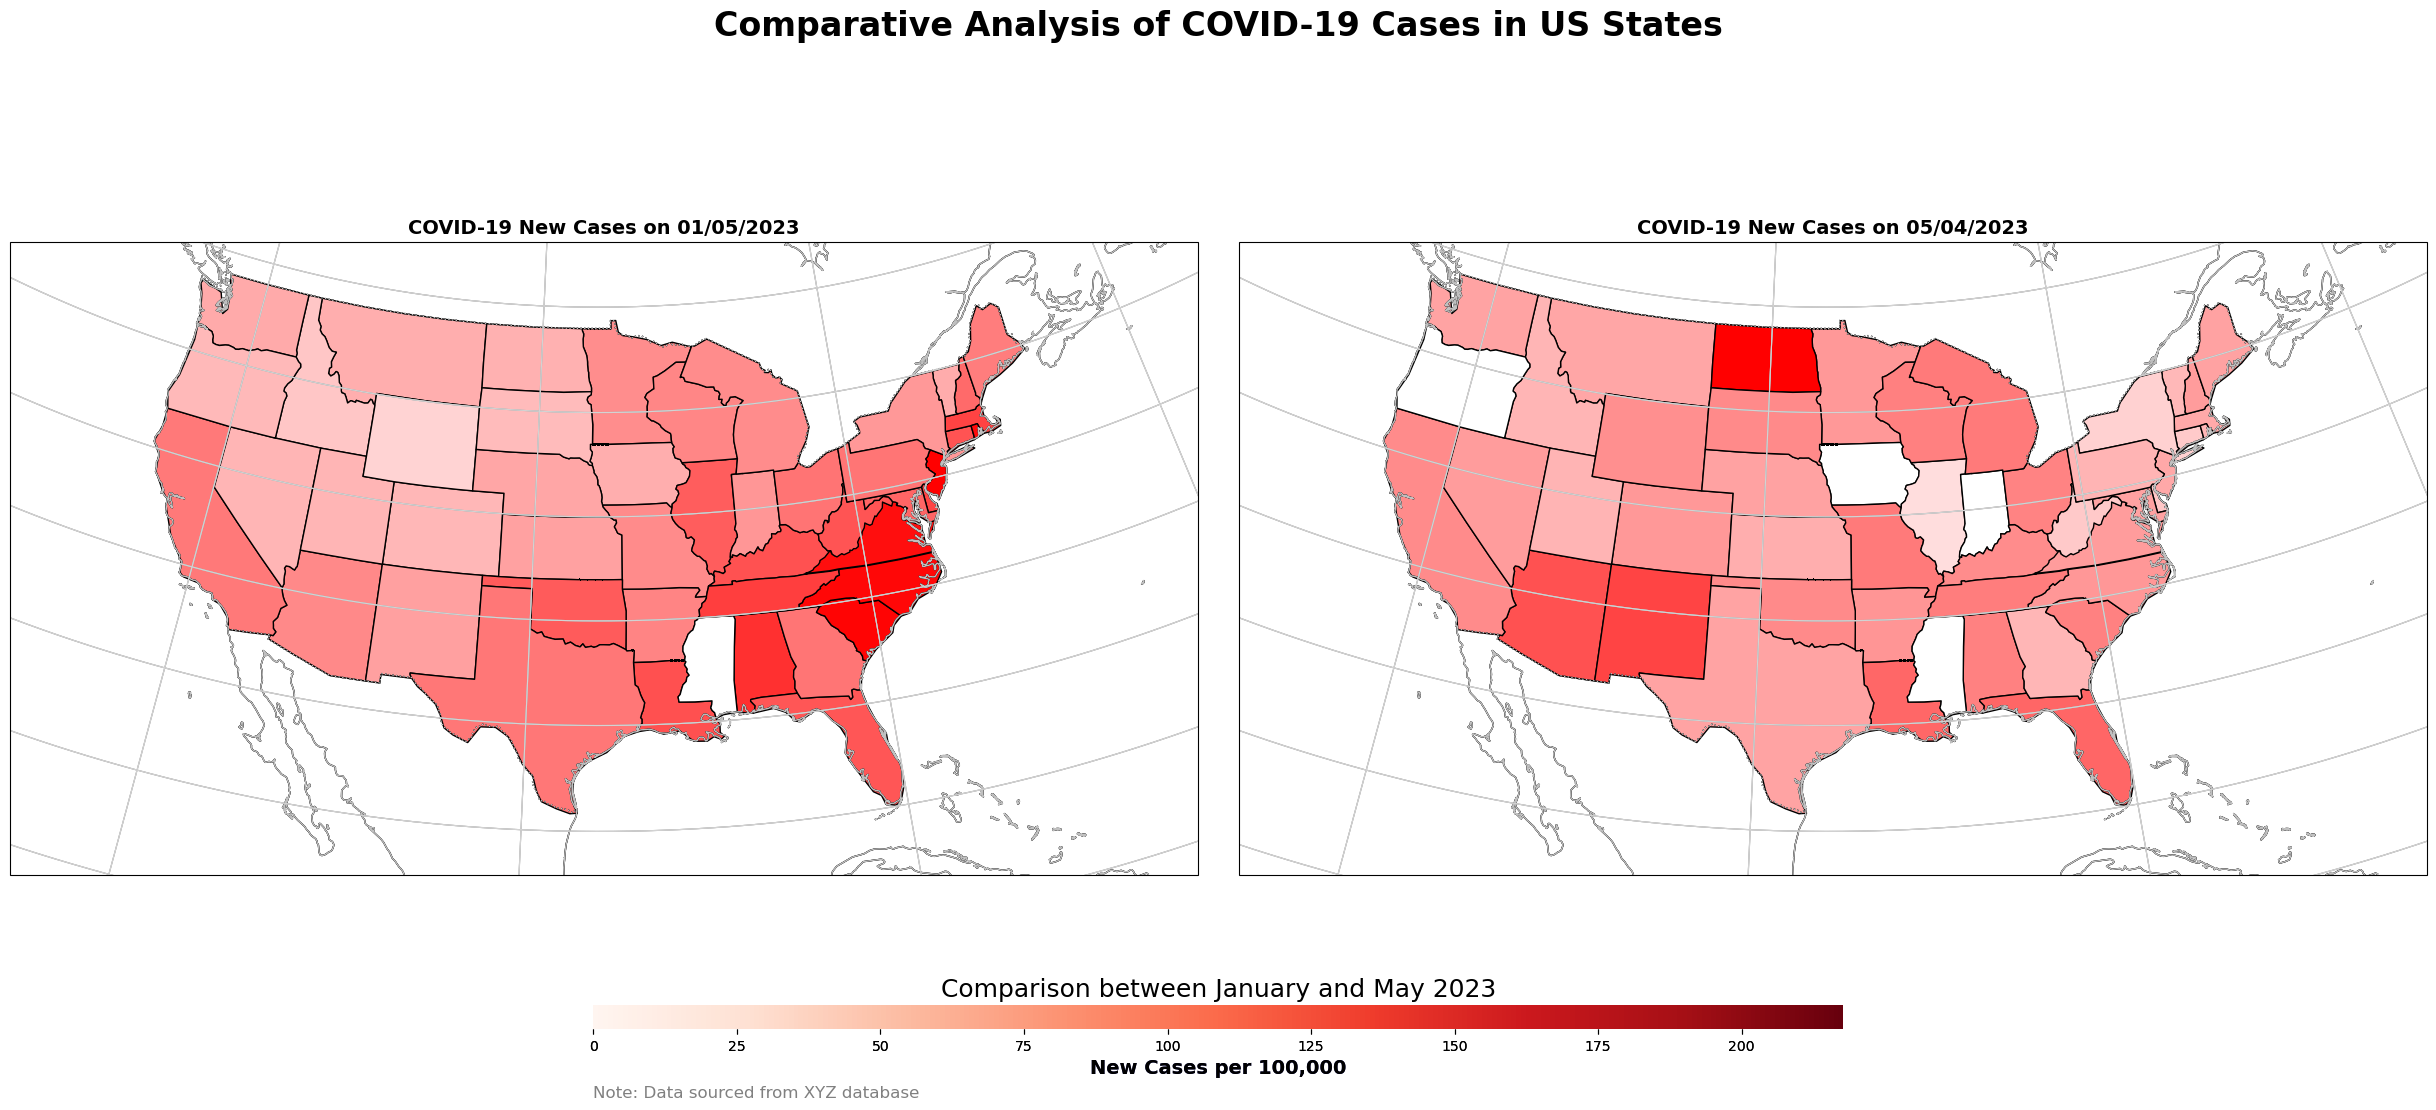

In [9]:
def color_picker(number, maximum, color):
    h = COLORDICT[color]/360
    s = float(number) / maximum if number != 0 else 0
    v = 1.0
    rgb = csys.hsv_to_rgb(h,s,v)
    return '#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))

def make_choropleth(subplot, d, date, maximum):

    colormap = plt.get_cmap('viridis')  # Define colormap here

    shapename = "admin_1_states_provinces"
    path_to_file = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
    reader = shpreader.Reader(path_to_file)
    record_iterator = reader.records()

    for record in record_iterator:
        state_abbrev = record.attributes["postal"]
        facecolor = color_picker(d.get(state_abbrev, 0), maximum, 'red')
        subplot.add_geometries([record.geometry], ccrs.PlateCarree(), facecolor=facecolor, edgecolor="black")

    us = [-125, -66.5, 20, 50]
    subplot.set_extent(us)
    subplot.add_feature(cfeat.COASTLINE)
    subplot.add_feature(cfeat.BORDERS, linestyle=':')
    subplot.gridlines()

     # Adding features for a more professional look
    subplot.add_feature(cfeat.COASTLINE)
    subplot.add_feature(cfeat.BORDERS, linestyle=':')
    subplot.gridlines()

    # Update to the more vibrant colormap
    subplot.add_feature(cfeat.COASTLINE, edgecolor='silver')
    subplot.add_feature(cfeat.BORDERS, linestyle=':', edgecolor='silver')
    subplot.gridlines(color='lightgrey')


    # Adding a title to each subplot
    subplot.set_title(f'COVID-19 New Cases on {date}', fontsize=14, fontweight='bold')


def create_subplot(index, fig):
    ax = fig.add_subplot(1, 2, index, projection=ccrs.LambertConformal())
    return ax

def main():
    fig = plt.figure(figsize=(25, 12))

    January_23_subplot = create_subplot(1, fig)
    j_date = '01/05/2023'
    j_d = make_dict(j_date)
    j_maximum = max(j_d.values())
    make_choropleth(January_23_subplot, j_d, j_date, j_maximum)

    May_23_subplot = create_subplot(2, fig)
    m_date = '05/04/2023'
    m_d = make_dict(m_date)
    m_maximum = max(m_d.values())
    make_choropleth(May_23_subplot, m_d, m_date, m_maximum)

    # Normalize color map
    dynamic_max = max(j_maximum, m_maximum)
    norm = mpl.colors.Normalize(vmin=0, vmax=dynamic_max)
    colormap = plt.get_cmap('viridis')  # Define colormap here


    # Add Colorbar
    cax = plt.axes([0.25, 0.05, 0.5, 0.02], frameon=False)
    mpl.colorbar.ColorbarBase(cax, cmap= colormap, norm=norm, orientation='horizontal')
    cax.set_xlabel('New Cases per 100,000', fontsize=14, fontweight='bold', color='midnightblue')

    # cax.set_xlabel('New Cases per 100,000')

    # Title and Subtitle
    fig.suptitle('COVID-19 New Cases per 100,000 in US States', fontsize=24, y=1.05)
    plt.title('Comparison between January and May 2023', fontsize=18, y=1.02)

    # Layout Adjustment
    plt.tight_layout(pad=3)
    plt.subplots_adjust(top=0.85)

    # Add a colorbar
    cax = plt.axes([0.25, 0.05, 0.5, 0.02], frameon=False)
    mpl.colorbar.ColorbarBase(cax, cmap=plt.get_cmap('Reds'), norm=norm, orientation='horizontal')
    cax.set_xlabel('New Cases per 100,000', fontsize=14, fontweight='bold')

    # Adjust layout and show plot
    plt.tight_layout(pad=3)
    plt.subplots_adjust(top=0.85)

    # Adding a main title for the entire figure
    fig.suptitle('Comparative Analysis of COVID-19 Cases in US States', fontsize=24, fontweight='bold', y=0.9)

    # Provide Context through annotations
    plt.annotate('Note: Data sourced from XYZ database', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12, color='gray')


    plt.show()

main()


